# Cross validation for the model

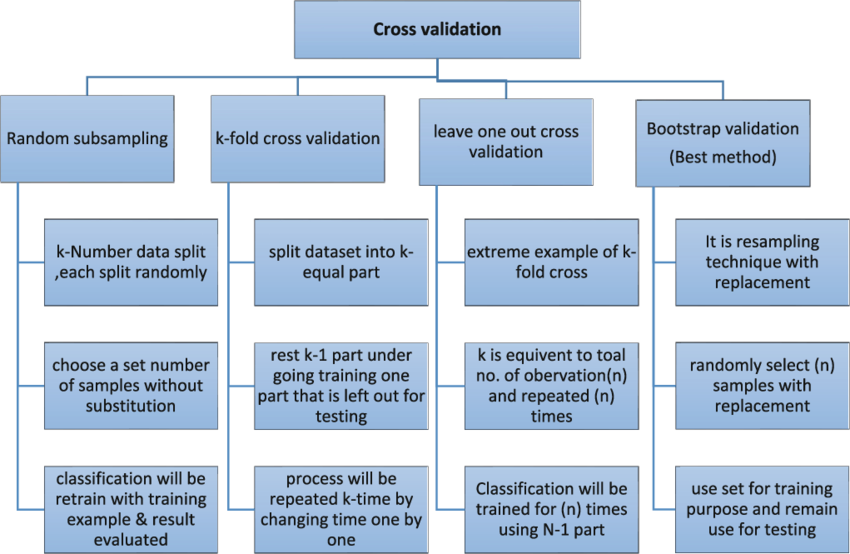


- KFlod
- Leave-One-Out Cross-Validation (LOOCV)
- StratifiedKFold
- Bootstrap Validation


## KFold 
KFold 是最常見的交叉驗證方法之一，它將資料集分成 k 個連續的折數，每個折數中類別的分佈可能是隨機的。 <br>
這意味著在每個折數中，類別的比例可能與原始資料集中的比例不一致，尤其在類別不平衡的情況下。<br>

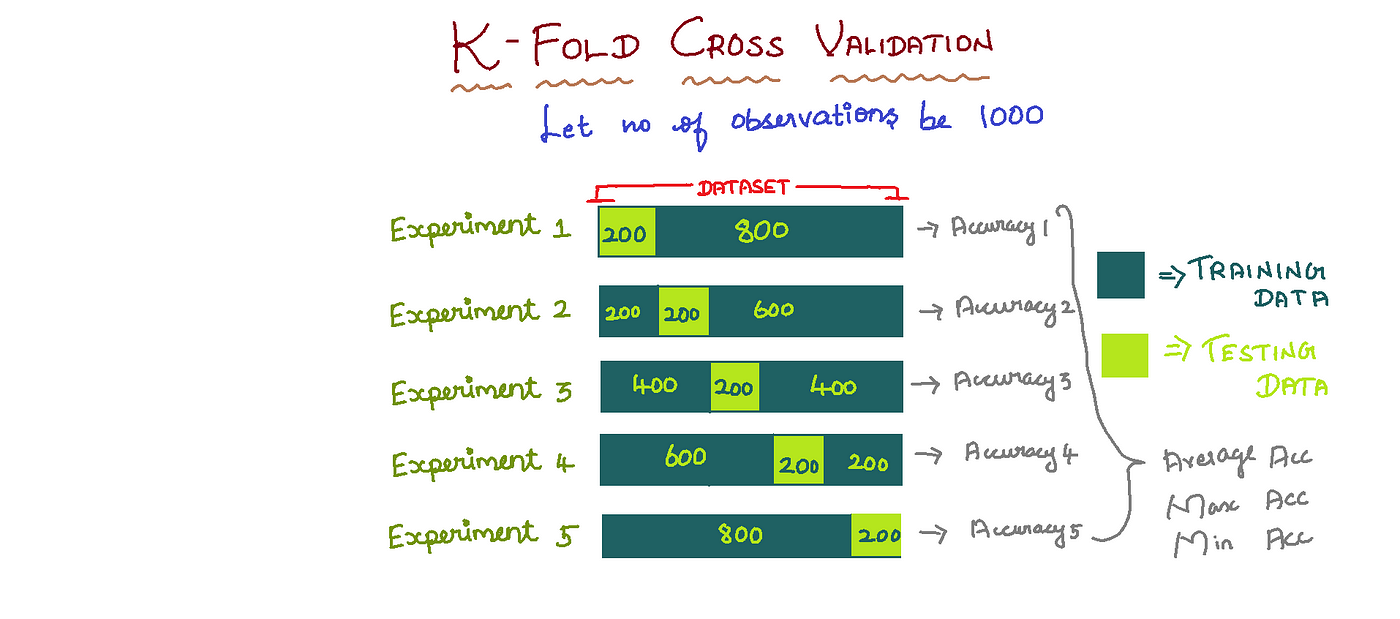

In [65]:
from sklearn.model_selection import KFold
import numpy as np

# Generate sample data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16], [17, 18], [19, 20]])
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])  # Binary classification labels (0 and 1)

# Display sample data
print("Sample features (X):")
print(X)
print("\nSample labels (y):")
print(y)

# Define the number of splits (k=5)
n_splits = 5

# Initialize StratifiedKFold with 5 splits
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Now you can use this kf object in cross-validation or other procedures
# For example:
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print("Fold:", fold+1)
    print("Train indices:", train_index)
    print("Test indices:", test_index)
    # Use train_index and test_index to access the data for each fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train your model using X_train, y_train and evaluate on X_test, y_test




Sample features (X):
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]
 [17 18]
 [19 20]]

Sample labels (y):
[0 1 0 1 0 1 0 1 0 1]
Fold: 1
Train indices: [0 2 3 4 5 6 7 9]
Test indices: [1 8]
Fold: 2
Train indices: [1 2 3 4 6 7 8 9]
Test indices: [0 5]
Fold: 3
Train indices: [0 1 3 4 5 6 8 9]
Test indices: [2 7]
Fold: 4
Train indices: [0 1 2 3 5 6 7 8]
Test indices: [4 9]
Fold: 5
Train indices: [0 1 2 4 5 7 8 9]
Test indices: [3 6]


## Leave-One-Out Cross-Validation (LOOCV)

逐一交叉驗證是 k 折交叉驗證的一種極端情況，其中折數等於數據集中觀測值的數量。在這種情況下，每個觀測值都被一次用作測試集。

In [66]:
from sklearn.model_selection import LeaveOneOut
import numpy as np

# Generate sample data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16], [17, 18], [19, 20]])
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])  # Binary classification labels (0 and 1)


# Display sample data
print("Sample features (X):")
print(X)
print("\nSample labels (y):")
print(y)

# Initialize LeaveOneOut
loo = LeaveOneOut()

# Now you can use this loo object in cross-validation or other procedures
# For example:
for train_index, test_index in loo.split(X, y):
    print("Train indices:", train_index)
    print("Test indices:", test_index)
    # Use train_index and test_index to access the data for each fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train your model using X_train, y_train and evaluate on X_test, y_test


Sample features (X):
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]
 [17 18]
 [19 20]]

Sample labels (y):
[0 1 0 1 0 1 0 1 0 1]
Train indices: [1 2 3 4 5 6 7 8 9]
Test indices: [0]
Train indices: [0 2 3 4 5 6 7 8 9]
Test indices: [1]
Train indices: [0 1 3 4 5 6 7 8 9]
Test indices: [2]
Train indices: [0 1 2 4 5 6 7 8 9]
Test indices: [3]
Train indices: [0 1 2 3 5 6 7 8 9]
Test indices: [4]
Train indices: [0 1 2 3 4 6 7 8 9]
Test indices: [5]
Train indices: [0 1 2 3 4 5 7 8 9]
Test indices: [6]
Train indices: [0 1 2 3 4 5 6 8 9]
Test indices: [7]
Train indices: [0 1 2 3 4 5 6 7 9]
Test indices: [8]
Train indices: [0 1 2 3 4 5 6 7 8]
Test indices: [9]


## StratifiedKFold:
StratifiedKFold 也將資料集分成 k 個折數，但它保證每個折數中每個類別的比例與原始資料集中的比例相同或接近。<br>
這對於類別不平衡的資料集特別重要，因為它確保了在每個折數中，所有類別的樣本都能得到適當的代表。<br>

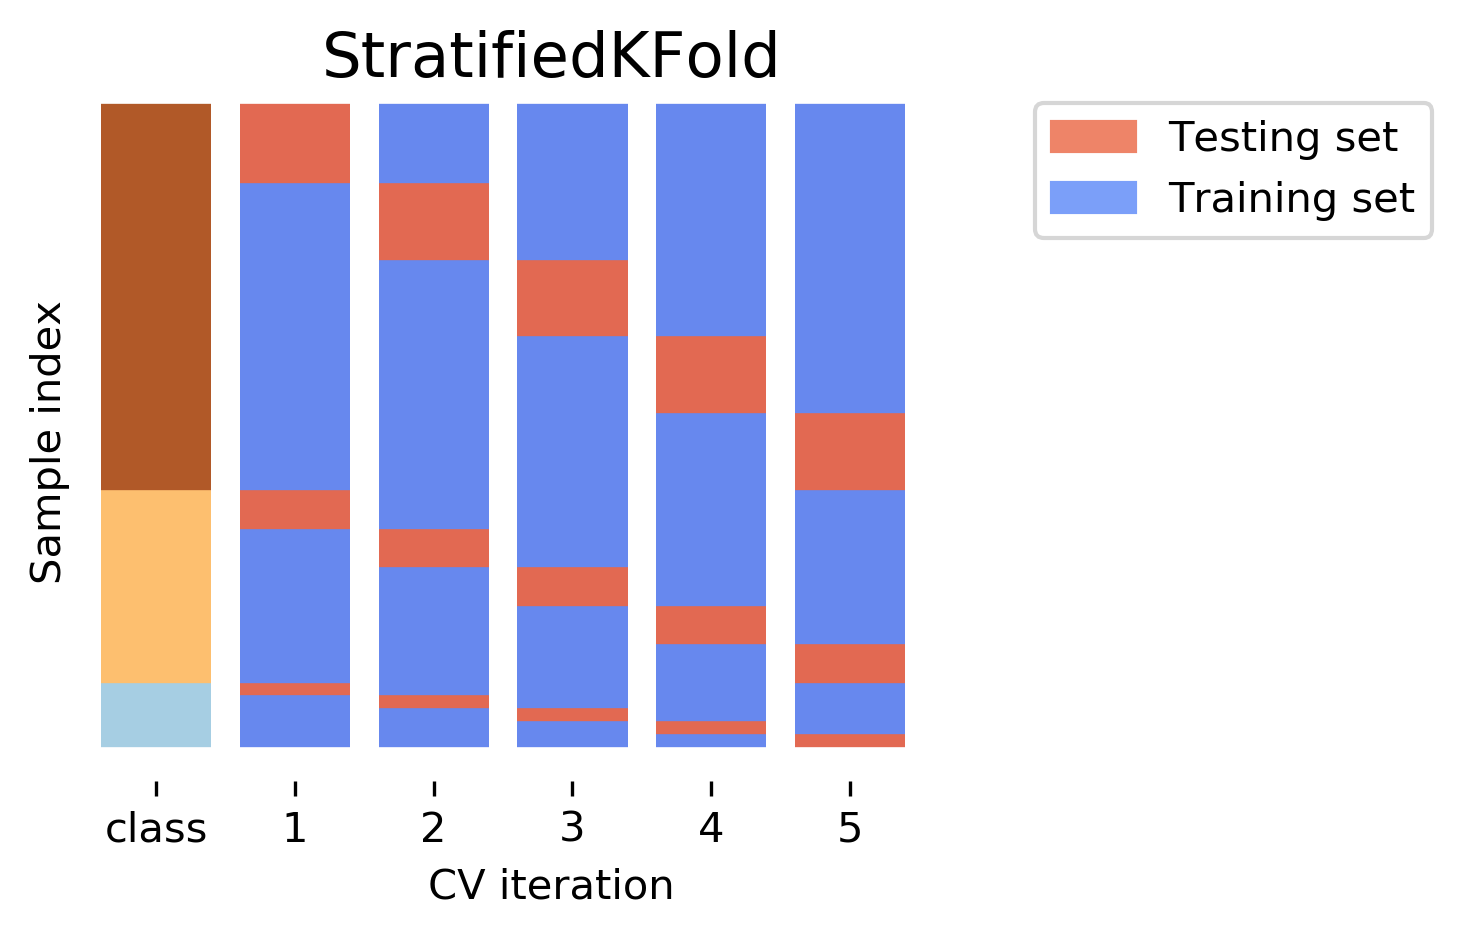

- Each fold contains 20% of the total data (1/k, where k is the number of splits).
- In this example, since the total number of samples is 10, each fold will contain 2 samples (10 samples / 5 folds).
- The class distribution is maintained within each fold.

In [67]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Generate sample data
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16], [17, 18], [19, 20]])
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])  # Binary classification labels (0 and 1)

# Display sample data
print("Sample features (X):")
print(X)
print("\nSample labels (y):")
print(y)

# Define the number of splits (k=5)
n_splits = 5

# Initialize StratifiedKFold with 5 splits
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Now you can use this kf object in cross-validation or other procedures
# For example:
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    print("Fold:", fold+1)
    print("Train indices:", train_index)
    print("Test indices:", test_index)
    # Use train_index and test_index to access the data for each fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train your model using X_train, y_train and evaluate on X_test, y_test




Sample features (X):
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]
 [17 18]
 [19 20]]

Sample labels (y):
[0 1 0 1 0 1 0 1 0 1]
Fold: 1
Train indices: [0 1 2 3 4 5 8 9]
Test indices: [6 7]
Fold: 2
Train indices: [1 2 4 5 6 7 8 9]
Test indices: [0 3]
Fold: 3
Train indices: [0 1 2 3 6 7 8 9]
Test indices: [4 5]
Fold: 4
Train indices: [0 2 3 4 5 6 7 9]
Test indices: [1 8]
Fold: 5
Train indices: [0 1 3 4 5 6 7 8]
Test indices: [2 9]


## KFold vs. StratifiedKFold 


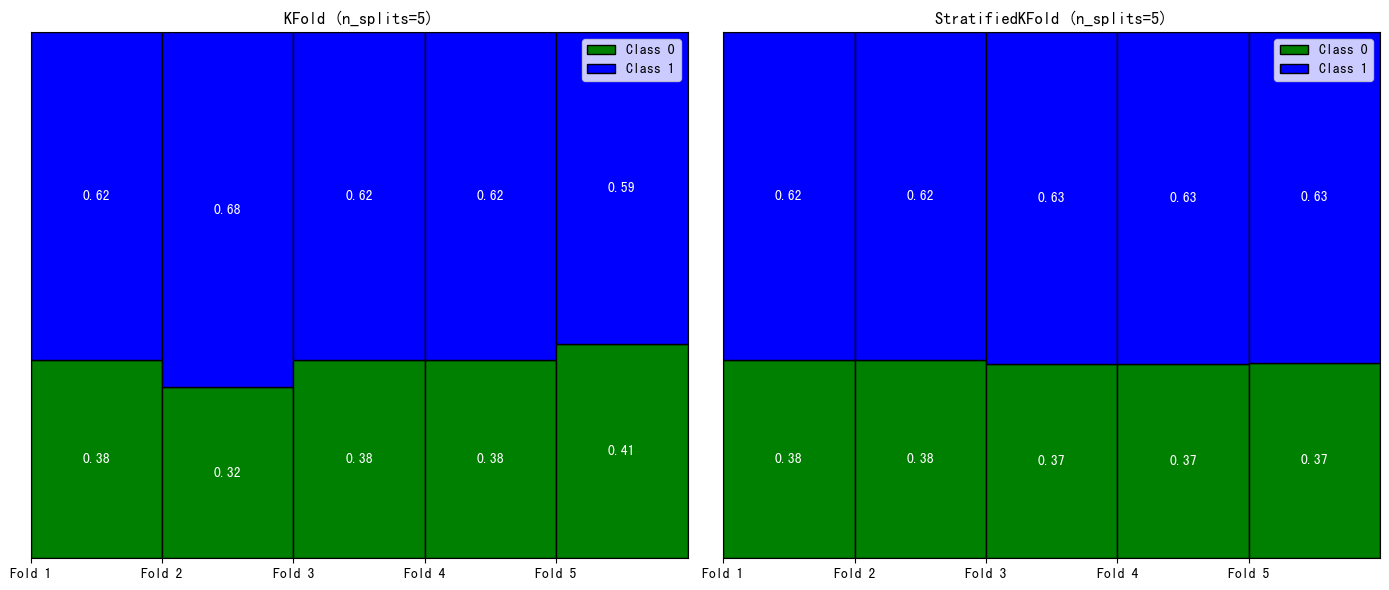

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Initialize KFold and StratifiedKFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepare to collect data for visualization
kf_data = []
skf_data = []

# Generate KFold splits
for train_index, test_index in kf.split(X):
    fold_counts = np.bincount(y[test_index], minlength=2)
    kf_data.append(fold_counts / len(test_index))

# Generate StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    fold_counts = np.bincount(y[test_index], minlength=2)
    skf_data.append(fold_counts / len(test_index))

# Colors for the classes
colors = ['green', 'blue']

# Create a figure and axis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot KFold visualization
for i, fold in enumerate(kf_data):
    bottom = 0
    for j, percentage in enumerate(fold):
        rect = patches.Rectangle((i, bottom), 1, percentage, edgecolor='black', facecolor=colors[j])
        axes[0].add_patch(rect)
        axes[0].text(i + 0.5, bottom + percentage / 2, f'{percentage:.2f}', ha='center', va='center', color='white')
        bottom += percentage

# Plot StratifiedKFold visualization
for i, fold in enumerate(skf_data):
    bottom = 0
    for j, percentage in enumerate(fold):
        rect = patches.Rectangle((i, bottom), 1, percentage, edgecolor='black', facecolor=colors[j])
        axes[1].add_patch(rect)
        axes[1].text(i + 0.5, bottom + percentage / 2, f'{percentage:.2f}', ha='center', va='center', color='white')
        bottom += percentage

# Set titles and labels
axes[0].set_title('KFold (n_splits=5)')
axes[0].set_xticks(range(5))
axes[0].set_xticklabels([f'Fold {i+1}' for i in range(5)])
axes[0].set_yticks([])
axes[0].set_xlim(0, 5)
axes[0].set_ylim(0, 1)

axes[1].set_title('StratifiedKFold (n_splits=5)')
axes[1].set_xticks(range(5))
axes[1].set_xticklabels([f'Fold {i+1}' for i in range(5)])
axes[1].set_yticks([])
axes[1].set_xlim(0, 5)
axes[1].set_ylim(0, 1)

# Add legends
legend_elements = [patches.Patch(facecolor=colors[i], edgecolor='black', label=f'Class {i}') for i in range(len(colors))]
axes[0].legend(handles=legend_elements, loc='upper right')
axes[1].legend(handles=legend_elements, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


## Bootstrap Validation

Bootstrap 驗證涉及通過替代選擇觀測值創建多個樣本（自助數據集）。這些樣本用於訓練，而未選擇的觀測值（袋外樣本）用於測試。

In [69]:
from sklearn.utils import resample
import numpy as np

# 生成示例數據
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16], [17,18], [19,20]])
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])  # 二元分類標籤 (0 和 1)

# 顯示示例數據
print("範例特徵 (X):")
print(X)
print("\n範例標籤 (y):")
print(y)

print("-------------------------我是分隔線-------------------------")

# 自助樣本數量
n_bootstrap_samples = 5

# 自助採樣
for i in range(n_bootstrap_samples):
    # 重採樣數據
    X_resampled, y_resampled = resample(X, y, replace=True, random_state=i)
    # 找出袋外樣本
    out_of_bag = np.setdiff1d(np.arange(len(X)), np.unique(resample(np.arange(len(X)), replace=True, random_state=i)))

    print(f"自助樣本 {i+1}:")
    print("重採樣訓練索引:", np.unique(resample(np.arange(len(X)), replace=True, random_state=i)))
    print("袋外測試索引:", out_of_bag)
    
    # 使用重採樣索引訪問數據
    X_train, X_test = X[np.unique(resample(np.arange(len(X)), replace=True, random_state=i))], X[out_of_bag]
    y_train, y_test = y[np.unique(resample(np.arange(len(X)), replace=True, random_state=i))], y[out_of_bag]
    
    # 列印訓練和測試數據集
    print("訓練特徵 (X_train):")
    print(X_train)
    print("訓練標籤 (y_train):")
    print(y_train)
    print("測試特徵 (X_test):")
    print(X_test)
    print("測試標籤 (y_test):")
    print(y_test)
    print("\n")



範例特徵 (X):
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]
 [17 18]
 [19 20]]

範例標籤 (y):
[0 1 0 1 0 1 0 1 0 1]
-------------------------我是分隔線-------------------------
自助樣本 1:
重採樣訓練索引: [0 2 3 4 5 7 9]
袋外測試索引: [1 6 8]
訓練特徵 (X_train):
[[ 1  2]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]
 [15 16]
 [19 20]]
訓練標籤 (y_train):
[0 0 1 0 1 1 1]
測試特徵 (X_test):
[[ 3  4]
 [13 14]
 [17 18]]
測試標籤 (y_test):
[1 0 0]


自助樣本 2:
重採樣訓練索引: [0 1 5 6 7 8 9]
袋外測試索引: [2 3 4]
訓練特徵 (X_train):
[[ 1  2]
 [ 3  4]
 [11 12]
 [13 14]
 [15 16]
 [17 18]
 [19 20]]
訓練標籤 (y_train):
[0 1 1 0 1 0 1]
測試特徵 (X_test):
[[ 5  6]
 [ 7  8]
 [ 9 10]]
測試標籤 (y_test):
[0 1 0]


自助樣本 3:
重採樣訓練索引: [1 2 4 5 6 7 8]
袋外測試索引: [0 3 9]
訓練特徵 (X_train):
[[ 3  4]
 [ 5  6]
 [ 9 10]
 [11 12]
 [13 14]
 [15 16]
 [17 18]]
訓練標籤 (y_train):
[1 0 0 1 0 1 0]
測試特徵 (X_test):
[[ 1  2]
 [ 7  8]
 [19 20]]
測試標籤 (y_test):
[0 1 1]


自助樣本 4:
重採樣訓練索引: [0 3 5 8 9]
袋外測試索引: [1 2 4 6 7]
訓練特徵 (X_train):
[[ 1  2]
 [ 7  8]
 [11 12]
 [17 18]
 [19 20]]
訓練標籤 (y_trai

## Nested cross-validation

Nested cross-validation is a technique used to evaluate the performance of a model and its hyperparameters. It involves two layers of cross-validation: an inner loop for hyperparameter tuning and an outer loop for model evaluation. Here’s a demonstration using StratifiedKFold in a nested cross-validation setup.

Step-by-Step Guide
Outer Loop: Used for model evaluation.
Inner Loop: Used for hyperparameter tuning.


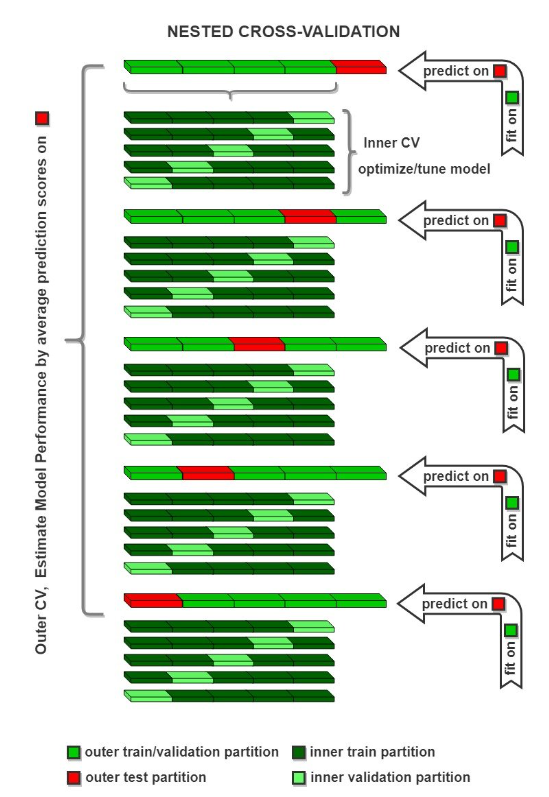

In [1]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Load a sample dataset
data = load_iris()
X, y = data.data, data.target

# Define the number of splits for outer and inner loops
outer_splits = 5
inner_splits = 3

# Initialize StratifiedKFold for outer loop
outer_cv = StratifiedKFold(n_splits=outer_splits, shuffle=True, random_state=42)

# Initialize a list to store the results
outer_results = []

# Define hyperparameters for the inner loop (GridSearchCV)
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Outer loop
for fold, (train_index, test_index) in enumerate(outer_cv.split(X, y)):
    print(f"\nOuter Fold {fold + 1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Initialize StratifiedKFold for inner loop
    inner_cv = StratifiedKFold(n_splits=inner_splits, shuffle=True, random_state=42)
    
    # Initialize GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(SVC(), param_grid, cv=inner_cv)
    grid_search.fit(X_train, y_train)
    
    # Best model from inner loop
    best_model = grid_search.best_estimator_
    
    # Evaluate the best model on the outer test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    outer_results.append(accuracy)
    
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Test Accuracy: {accuracy:.4f}")

# Display the final results
print("\nFinal Results from Nested Cross-Validation:")
print(f"Mean Accuracy: {np.mean(outer_results):.4f}")
print(f"Standard Deviation: {np.std(outer_results):.4f}")



Outer Fold 1:
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Test Accuracy: 1.0000

Outer Fold 2:
Best Parameters: {'C': 1, 'kernel': 'linear'}
Test Accuracy: 1.0000

Outer Fold 3:
Best Parameters: {'C': 1, 'kernel': 'linear'}
Test Accuracy: 0.9333

Outer Fold 4:
Best Parameters: {'C': 1, 'kernel': 'linear'}
Test Accuracy: 1.0000

Outer Fold 5:
Best Parameters: {'C': 10, 'kernel': 'linear'}
Test Accuracy: 0.9667

Final Results from Nested Cross-Validation:
Mean Accuracy: 0.9800
Standard Deviation: 0.0267


## 比較 nested cross-validation 和 cross-validation 的訓練穩定性

Average difference of 0.007581 with std. dev. of 0.007833.


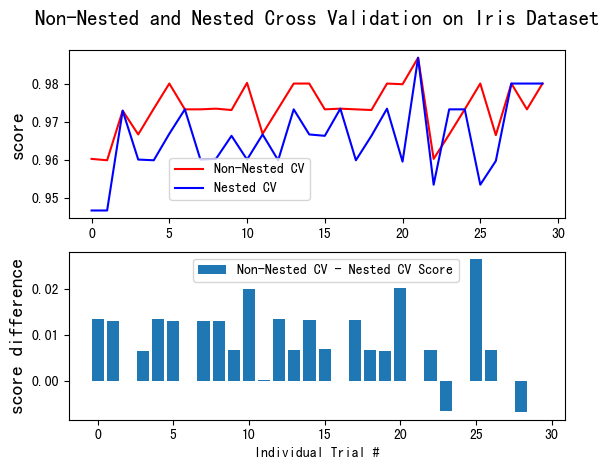

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.svm import SVC

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100], "gamma": [0.01, 0.1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation on Iris Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")

plt.show()